In [2]:
library(tidyverse)
library(patchwork)

# Load the clean data
df <- read_rds("../data/telecom_churn_clean.rds")

# Set a professional theme for all plots
theme_set(theme_minimal() + 
          theme(plot.title = element_text(face = "bold", size = 14),
                legend.position = "bottom"))

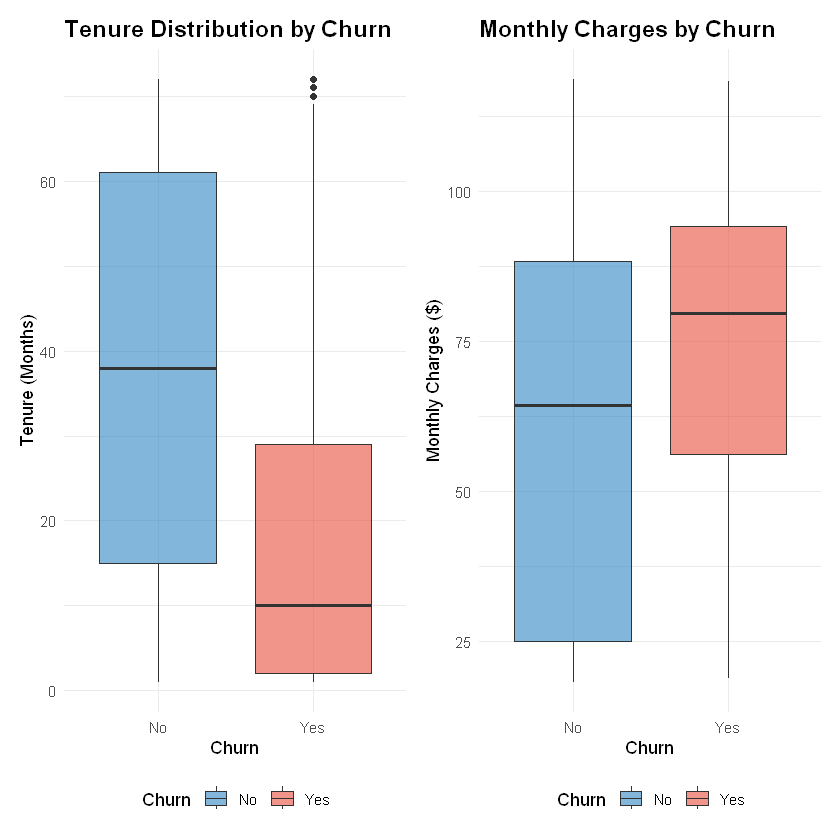

In [3]:
# 1. Tenure vs Churn
p1 <- ggplot(df, aes(x = Churn, y = tenure, fill = Churn)) +
  geom_boxplot(alpha = 0.6) +
  labs(title = "Tenure Distribution by Churn", y = "Tenure (Months)") +
  scale_fill_manual(values = c("#2E86C1", "#E74C3C")) # Blue for No, Red for Yes

# 2. Monthly Charges vs Churn
p2 <- ggplot(df, aes(x = Churn, y = MonthlyCharges, fill = Churn)) +
  geom_boxplot(alpha = 0.6) +
  labs(title = "Monthly Charges by Churn", y = "Monthly Charges ($)") +
  scale_fill_manual(values = c("#2E86C1", "#E74C3C"))

# Display side by side
p1 + p2

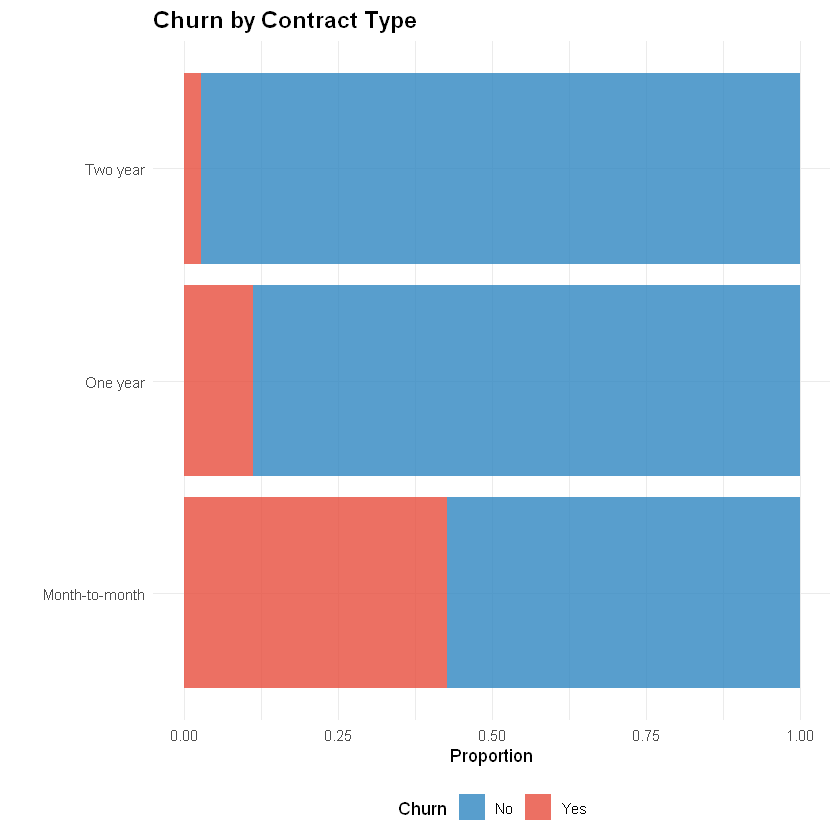

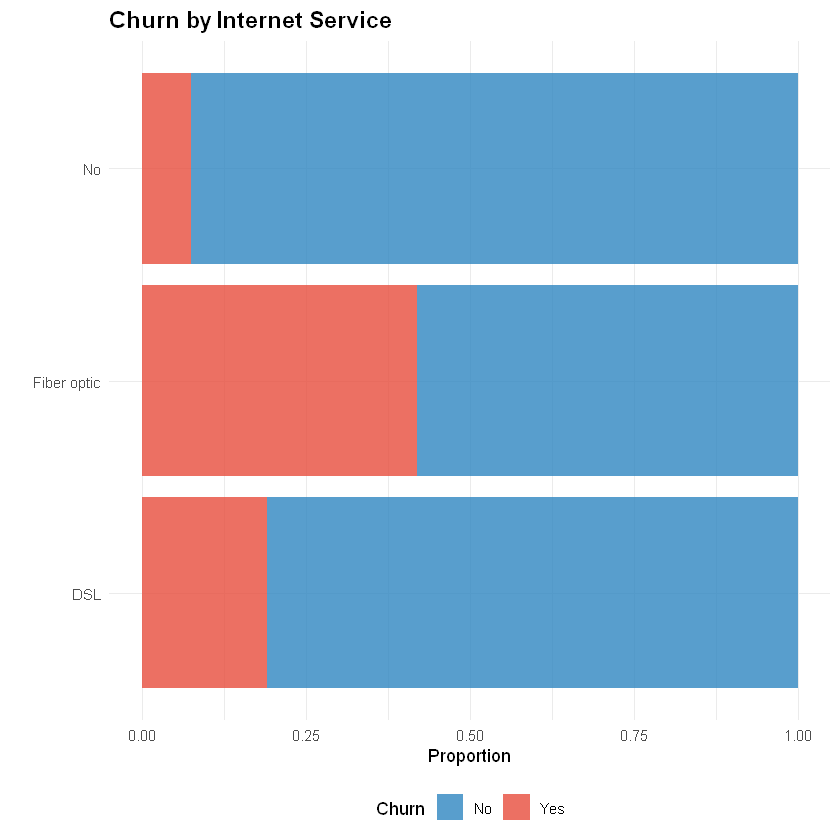

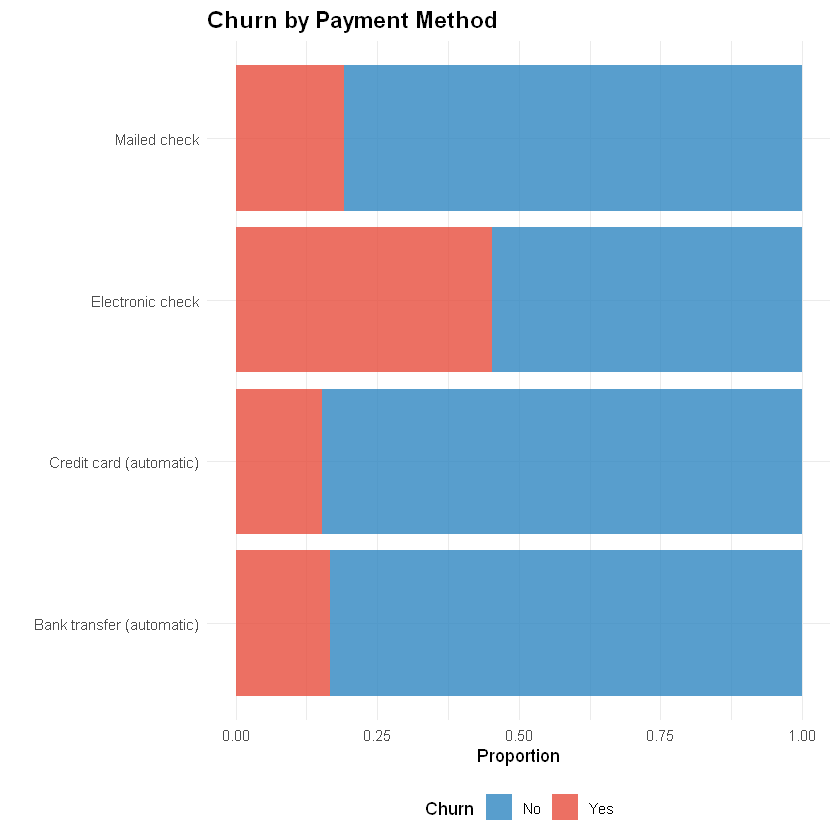

In [6]:
# Function to create stacked bar charts easily
plot_categorical <- function(column_name, title_text) {
  df %>%
    ggplot(aes(x = .data[[column_name]], fill = Churn)) +
    geom_bar(position = "fill", alpha = 0.8) + # "fill" shows proportions (0 to 1)
    labs(title = title_text, y = "Proportion", x = "") +
    scale_fill_manual(values = c("#2E86C1", "#E74C3C")) +
    coord_flip() # Horizontal bars are easier to read
}

# Create key plots
plot_contract <- plot_categorical("Contract", "Churn by Contract Type")
plot_internet <- plot_categorical("InternetService", "Churn by Internet Service")
plot_payment  <- plot_categorical("PaymentMethod", "Churn by Payment Method")

# Display them
print(plot_contract)
print(plot_internet)
print(plot_payment)

In [7]:
# Save the plots
ggsave("../results/eda_tenure_charges.png", p1 + p2, width = 10, height = 5)
ggsave("../results/eda_contract.png", plot_contract, width = 8, height = 4)
ggsave("../results/eda_internet.png", plot_internet, width = 8, height = 4)
ggsave("../results/eda_payment.png", plot_payment, width = 8, height = 4)

print("EDA plots saved to results/ folder.")

[1] "EDA plots saved to results/ folder."
